# Logistic Regression

In this assignment, you will implement logistic regression and apply it to a dataset. 



<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math


## 2 - Logistic Regression

In this part of the assignment, you will build a logistic regression model to predict whether a patient gets breast cancer.

### 2.1 Problem Statement

Suppose that you want to determine each patient’s chance of getting breast cancer. 
* You have historical data from previous patients that you can use as a training set for logistic regression. 
* For each training example, you have the applicant’s tumor radius and texture as well as the dignosis. 
    - radius - mean of distances from center to points on the perimeter
    - texture - standard deviation of gray-scale values
* Your task is to build a classification model that estimates a patient’s probability of getting breast cancer based on the tumor radius and texture. 


### 2.2 Loading and visualizing the data

You will start by loading the dataset for this task. 
  - `X_train` contains tumor radius and texture of patients
  - `y_train` is the dignosis decision 
      - `y_train = 1` if the patient got breast cancer 
      - `y_train = 0` if the patient did not get breast cancer 
  - Both `X_train` and `y_train` are numpy arrays.


In [2]:
def load_data(filename):
    data = np.loadtxt(filename)
    X = data[:,:2]
    y = data[:,2]

    return X, y

In [3]:
# load dataset

X_train, y_train = load_data("./data/breastcancer.txt")

#### View the variables
Let's get more familiar with your dataset.  
- A good place to start is to just print out each variable and see what it contains.

The code below prints the first five values of `X_train` and the type of the variable.

In [4]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[17.99 10.38]
 [20.57 17.77]
 [19.69 21.25]
 [11.42 20.38]
 [20.29 14.34]]
Type of X_train: <class 'numpy.ndarray'>


Now print the first five values of `y_train`

In [5]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions. Let's print the shape of `X_train` and `y_train` and see how many training examples we have in our dataset.

In [6]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (569, 2)
The shape of y_train is: (569,)
We have m = 569 training examples


#### Visualize your data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.
- The code below displays the data on a 2D plot, where the axes are the tumor radius and texture, and the positive and negative examples are shown with different markers.


In [7]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)

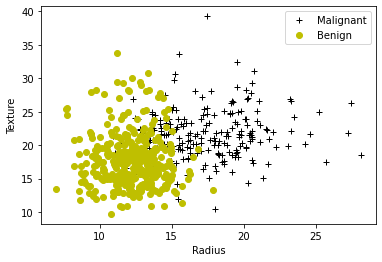

In [8]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Malignant", neg_label="Benign")

# Set the y-axis label
plt.ylabel('Texture') 
# Set the x-axis label
plt.xlabel('Radius') 
plt.legend(loc="upper right")
plt.show()

Your goal is to build a logistic regression model to fit this data.


<a name="2.3"></a>
### 2.3  Sigmoid function

Recall that for logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Let's implement the sigmoid function first, so it can be used by the rest of this assignment.


Please complete  the `sigmoid` function to calculate

$$g(z) = \frac{1}{1+e^{-z}}$$

Note that 
- `z` is not always a single number, but can also be an array of numbers. 
- If the input is an array of numbers, we'd like to apply the sigmoid function to each value in the input array.
- `numpy` has a function called [`np.exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html), which offers a convinient way to calculate the exponential ( $e^{z}$) of all elements in the input array (`z`).


In [36]:
# GRADED FUNCTION: sigmoid
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    ### START CODE HERE ### 
    if(isinstance(z, int) or isinstance(z, float)):
        g = 1 / (1 + np.exp(-1 * z))
    else:
        n = z.shape[0]
        g = np.zeros(n)
        for i in range(n):
            g[i] = 1 / (1 + np.exp(-1 * z[i]))
  
    
    ### END SOLUTION ###  
    
    return g

When you are finished, try testing a few values by calling `sigmoid(x)` in the cell below. 
- For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. 
- Evaluating `sigmoid(0)` should give you exactly 0.5. 


In [38]:
print ("sigmoid(0) = " + str(sigmoid(-100.0)))

sigmoid(0) = 3.7200759760208356e-44


**Expected Output**:
<table>
  <tr>
    <td> <b>sigmoid(0)<b></td>
    <td> 0.5 </td> 
  </tr>
</table>
    
- As mentioned before, your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

In [39]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]


**Expected Output**:
<table>
  <tr>
    <td><b>sigmoid([-1, 0, 1, 2])<b></td> 
    <td>[0.26894142        0.5           0.73105858        0.88079708]</td> 
  </tr>    
  
</table>


### 2.4 Cost function for logistic regression

In this section, you will implement the cost function for logistic regression.


Please complete the `compute_cost` function using the equations below.

Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.
    * It might be helpful to first calculate an intermediate variable $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ where $n$ is the number of features, before calculating $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$

Note:
* As you are doing this, remember that the variables `X_train` and `y_train` are not scalar values but matrices of shape ($m, n$) and ($𝑚$,1) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.
* You can use the sigmoid function that you implemented above for this part.


In [63]:
# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    ### START CODE HERE ###
    total_cost = 0
    for i in range(m):
        f_wb = sigmoid(np.dot(X[i], w) + b)
        total_cost += ((-1 * y[i] * np.log(f_wb)) - 
                       (1 - y[i]) * np.log((1 - f_wb)))
    
    total_cost = total_cost / m
    
    ### END CODE HERE ### 

    return total_cost

Run the cells below to check your implementation of the `compute_cost` function with two different initializations of the parameters $w$

In [64]:
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at initial w (zeros)<b></td>
    <td> 0.693 </td> 
  </tr>
</table>

In [65]:
# Compute and display cost with non-zero w
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))



Cost at test w,b: 6.031


**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at test w,b<b></td>
    <td> 6.031 </td> 
  </tr>
</table>


### 2.5 Gradient for logistic regression

In this section, you will implement the gradient for logistic regression.

Recall that the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously




Please complete the `compute_gradient` function to compute $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ from equations (2) and (3) below.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label


- **Note**: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $f_{\mathbf{w},b}(x)$.



In [66]:
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.


    ### START CODE HERE ### 
    for i in range(m):
        f_wb = sigmoid(np.dot(X[i], w) + b)
        dj_db += (f_wb - y[i])
        for j in range(n):
            dj_dw[j] += ((f_wb - y[i]) * X[i][j])
            
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    ### END CODE HERE ###

        
    return dj_db, dj_dw

Run the cells below to check your implementation of the `compute_gradient` function with two different initializations of the parameters $w$

In [67]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):0.1274165202108963
dj_dw at initial w (zeros):[0.557283831282953, 1.5951933216168726]


**Expected Output**:
<table>
  <tr>
    <td> <b>dj_db at initial w (zeros)<b></td>
    <td> -0.1274165202108963 </td> 
  </tr>
  <tr>
    <td> <b>ddj_dw at initial w (zeros):<b></td>
    <td> [0.557283831282953, 1.5951933216168726] </td> 
  </tr>
</table>

In [68]:
# Compute and display cost and gradient with non-zero w
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())


dj_db at test_w: -0.3725834797889203
dj_dw at test_w: [-6.506362038661654, -8.04963093145612]


**Expected Output**:
<table>
  <tr>
    <td> <b>dj_db at initial w (zeros)<b></td>
    <td> -0.3725834797889203 </td> 
  </tr>
  <tr>
    <td> <b>ddj_dw at initial w (zeros):<b></td>
    <td>  [-6.506362038661654, -8.04963093145612] </td> 
  </tr>
</table>

<a name="2.6"></a>
### 2.6 Learning parameters using gradient descent 

Similar to the previous assignment, you will now find the optimal parameters of a logistic regression model by using gradient descent. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(\mathbf{w},b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly, your value of $J(\mathbf{w},b)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [69]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient(X, y, w_in, b_in)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - (alpha * dj_dw)               
        b_in = b_in - (alpha * dj_db)              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

**Note**

The code block below takes a couple of minutes to run, especially with a non-vectorized version. 

In [70]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     2.87   
Iteration 1000: Cost     0.33   
Iteration 2000: Cost     0.33   
Iteration 3000: Cost     0.33   
Iteration 4000: Cost     0.33   
Iteration 5000: Cost     0.33   
Iteration 6000: Cost     0.33   
Iteration 7000: Cost     0.33   
Iteration 8000: Cost     0.33   
Iteration 9000: Cost     0.33   
Iteration 9999: Cost     0.33   


<details>
<summary>
    <b>Expected Output: Cost     0.33, (Click to see details):</b>
</summary>

    # With the following settings
    np.random.seed(1)
    intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
    initial_b = -8
    iterations = 10000
    alpha = 0.001
    #

```
Iteration    0: Cost     2.87   
Iteration 1000: Cost     0.33   
Iteration 2000: Cost     0.33   
Iteration 3000: Cost     0.33   
Iteration 4000: Cost     0.33   
Iteration 5000: Cost     0.33   
Iteration 6000: Cost     0.33   
Iteration 7000: Cost     0.33   
Iteration 8000: Cost     0.33   
Iteration 9000: Cost     0.33   
Iteration 9999: Cost     0.33   
  
```


### 2.7 Evaluating logistic regression

We can evaluate the quality of the parameters we have found by seeing how well the learned model predicts on our training set. 

You will implement the `predict` function below to do this.



Please complete the `predict` function to produce `1` or `0` predictions given a dataset and a learned parameter vector $w$ and $b$.
- First you need to compute the prediction from the model $f(x^{(i)}) = g(w \cdot x^{(i)})$ for every example 
    - You've implemented this before in the parts above
- We interpret the output of the model ($f(x^{(i)})$) as the probability that $y^{(i)}=1$ given $x^{(i)}$ and parameterized by $w$.
- Therefore, to get a final prediction ($y^{(i)}=0$ or $y^{(i)}=1$) from the logistic regression model, you can use the following heuristic -

  if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$
  
  if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$
    
If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [71]:
# GRADED FUNCTION: predict

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    for i in range(m):
        f_wb = sigmoid(np.dot(X[i], w) + b)
        p[i] = 0 if (f_wb < 0.5) else 1
    
        
    ### END CODE HERE ### 
    return p

Once you have completed the function `predict`, let's run the code below to report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [72]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')


Output of predict: shape (4,), value [0. 1. 1. 1.]


**Expected output** 

<table>
  <tr>
    <td> <b>Output of predict: shape (4,),value [0. 1. 1. 1.]<b></td>
  </tr>
</table>

Now let's use this to compute the accuracy on the training set

In [73]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 89.279438


<table>
  <tr>
    <td> <b>Train Accuracy (approx):<b></td>
    <td> 89.279438 </td> 
  </tr>
</table>